# NASA Space Apps 2020
## Automated Detection of Hazards  
  
____________________  

Before the prediction we need to get, prepare data.  
This process includes increasing values, feauture preparation, restoring missing values and connection.  

Firstly, we import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import random as r
import time
import datetime
import impyute as impy
import math
#import zipfile

#from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

Using TensorFlow backend.


Now we can import dataset(s)

In [2]:
!ls

earthquakes.csv  landslides.csv  model.ipynb


In [3]:
#zf = zipfile.ZipFile('ECA_nonblend_tg.zip')

In [4]:
df=pd.read_csv("landslides.csv")
df

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,"(38.600900000000003, -77.268199999999993)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,...,"(40.517499999999998, -81.430499999999995)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,...,"(40.4377, -79.915999999999997)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...
3,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,...,"(45.322600000000001, -73.777100000000004)",Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...
4,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,...,"(37.432499999999997, -82.493099999999998)",Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1688,7535,12/7/15,NaN,NaN,United States,US,North Carolina,1646,Tryon,7.80866,...,"(35.221899999999998, -82.322599999999994)",Landslide,Rockfall,Small,NaN,NaN,0.0,0.0,Tryon Daily Bulletin,http://www.tryondailybulletin.com/2016/02/26/u...
1689,7537,2/22/16,0:00,NaN,United States,US,West Virginia,51400,Charleston,6.84721,...,"(38.398699999999998, -81.584800000000001)",Landslide,Mudslide,Small,Unknown,NaN,0.0,0.0,Charleston Gazette,http://www.wvgazettemail.com/news/20160222/us-...
1690,7539,2/23/16,NaN,NaN,United States,US,West Virginia,2406,Welch,14.19735,...,"(37.409599999999998, -81.4268)",Landslide,Landslide,Small,Rain,NaN,0.0,0.0,Bluefield Daily Telegraph,http://www.bdtonline.com/news/officials-cautio...
1691,7540,2/26/16,21:06,NaN,United States,US,West Virginia,1048,Athens,12.00678,...,"(37.501100000000001, -81.109300000000005)",Landslide,Rockfall,Small,Unknown,NaN,0.0,0.0,Bluefield Daily Telegraph,http://www.bdtonline.com/news/rockslide-snarls...


Let's prepare data.  
1. [Clean](#Clean) 
2. [Replace NaN](#Replace-NaN)  
3. [Cut useless features](#Cut-useless-features)
4. [Encoding](#Encoding)
5. [Augment](#Augment)

### Clean

In [5]:
#Let's lower strings
df["landslide_type"]=df["landslide_type"].str.lower()
df["landslide_size"]=df["landslide_size"].str.lower()
df["trigger"]=df["trigger"].str.lower()

In [6]:
#Let's delete Unknown values
df = df[df.landslide_type != "unknown"]
df = df[df.trigger != "unknown"]

### Replace NaN and missing values

In [7]:
df=df.fillna(0)
df = df[df.trigger != 0] #Remove rows with 0 value
df[:5]

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
0,34,3/2/07,Night,0,United States,US,Virginia,16000,Cherry Hill,3.40765,...,"(38.600900000000003, -77.268199999999993)",Landslide,landslide,small,rain,0,0.0,0.0,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html
1,42,3/22/07,0,0,United States,US,Ohio,17288,New Philadelphia,3.33522,...,"(40.517499999999998, -81.430499999999995)",Landslide,landslide,small,rain,0,0.0,0.0,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...
2,56,4/6/07,0,0,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,...,"(40.4377, -79.915999999999997)",Landslide,landslide,small,rain,0,0.0,0.0,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...
3,59,4/14/07,0,0,Canada,CA,Quebec,42786,Châteauguay,2.98682,...,"(45.322600000000001, -73.777100000000004)",Landslide,riverbank collapse,small,rain,0,0.0,0.0,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...
4,61,4/15/07,0,0,United States,US,Kentucky,6903,Pikeville,5.66542,...,"(37.432499999999997, -82.493099999999998)",Landslide,landslide,small,downpour,0,0.0,0.0,Matthew Crawford (KGS),0


### Cut useless features

In [8]:
df=df.drop(columns=["id",
                 "time",
                 "continent_code",
                 "country_name",
                 "country_code",
                 "state/province",
                 "population",
                 "city/town",
                 "distance",
                 "location_description",
                 "geolocation",
                 "storm_name",
                 "source_name",
                 "source_link",
                 "hazard_type"
                ])
df[:5]

,date,latitude,longitude,landslide_type,landslide_size,trigger,injuries,fatalities
0,3/2/07,38.6009,-77.2682,landslide,small,rain,0.0,0.0
1,3/22/07,40.5175,-81.4305,landslide,small,rain,0.0,0.0
2,4/6/07,40.4377,-79.9160,landslide,small,rain,0.0,0.0
3,4/14/07,45.3226,-73.7771,riverbank collapse,small,rain,0.0,0.0
4,4/15/07,37.4325,-82.4931,landslide,small,downpour,0.0,0.0


### Let's look at all landslide types, sizes, triggers

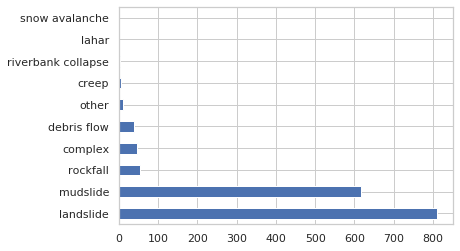

In [9]:
#Types
landslide_types = list(df['landslide_type'])
pd.Series(landslide_types).value_counts().plot(kind='barh')

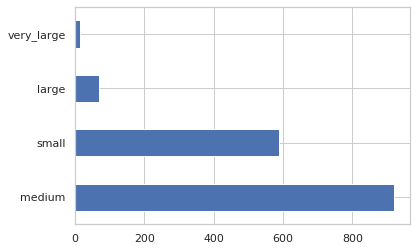

In [10]:
#Sizes
landslide_sizes = list(df['landslide_size'])
pd.Series(landslide_sizes).value_counts().plot(kind='barh')

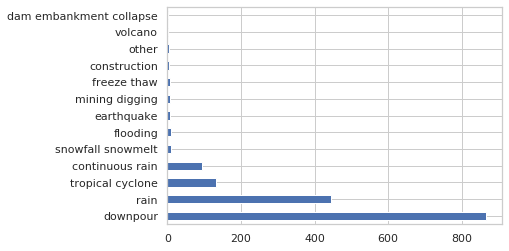

In [11]:
#Triggers
triggers = list(df['trigger'])
pd.Series(triggers).value_counts().plot(kind='barh')

### Encoding

In [12]:
def encode_dates(a):
    b=list(a)
    c=a.split("/")

    if(len(c[0])==1):
        b.insert(0,"0")
    if(len(c[1])==1):
        b.insert(3,"0")

    b.insert(-2,"0")
    b.insert(-3,"2")
    a="".join(b)
    ts=time.mktime(datetime.datetime.strptime(a, "%m/%d/%Y").timetuple())
    return ts
    #return math.sin(ts)

In [13]:
#Encode dates

df = df[df.date != 0] #Remove rows with 0 value
df['date']=df['date'].apply(encode_dates)
MaxDate=df['date'].max()
df['date']=df['date'].apply(lambda x: x/MaxDate)

In [14]:
#Categories

def myonehot_types(x):
    index=list(set(landslide_types)).index(x)
    #return [1 if i==index else 0 for i in range(len(set(landslide_types)))]
    return index
def myonehot_sizes(x):
    index=list(set(landslide_sizes)).index(x)
    #return [1 if i==index else 0 for i in range(len(set(landslide_sizes)))]
    return index
def myonehot_triggers(x):
    index=list(set(triggers)).index(x)
    #return [1 if i==index else 0 for i in range(len(set(triggers)))]
    return index

df['landslide_type']=df['landslide_type'].apply(myonehot_types)
df['landslide_size']=df['landslide_size'].apply(myonehot_sizes)
df['trigger']=df['trigger'].apply(myonehot_triggers)
df[:5]

,date,latitude,longitude,landslide_type,landslide_size,trigger,injuries,fatalities
0,0.805196,38.6009,-77.2682,5,1,2,0.0,0.0
1,0.806382,40.5175,-81.4305,5,1,2,0.0,0.0
2,0.807270,40.4377,-79.9160,5,1,2,0.0,0.0
3,0.807744,45.3226,-73.7771,8,1,2,0.0,0.0
4,0.807803,37.4325,-82.4931,5,1,7,0.0,0.0


### Augment

In [15]:
NCOUNT=10000
LL=len(df)

for l in range(NCOUNT):
    i=l/NCOUNT
    noise=df.iloc[r.randint(0,LL)]
    if(l%2==0):
        noise.date=df['date'][round(i*len(df)):len(df)//2+round(i*len(df)//2)].mean()
    else:
        noise.date=df['date'][round(i*len(df)):len(df)//2+round(i*len(df)//2)].median()
    
    df=df.append(noise,ignore_index=True)
df[-5:]

/home/tardis/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,date,latitude,longitude,landslide_type,landslide_size,trigger,injuries,fatalities
11584,0.894886,11.2965,-60.6312,5.0,2.0,2.0,0.0,0.0
11585,0.894933,14.6918,-91.1168,0.0,2.0,4.0,0.0,14.0
11586,0.894919,31.9780,-116.7776,0.0,2.0,7.0,0.0,0.0
11587,NaN,10.7163,-61.4719,5.0,1.0,7.0,0.0,0.0
11588,NaN,11.2505,-60.5750,5.0,2.0,4.0,0.0,0.0


In [16]:
df=df.dropna()
df

,date,latitude,longitude,landslide_type,landslide_size,trigger,injuries,fatalities
0,0.894929,38.6009,-77.2682,5.0,1.0,2.0,0.0,0.0
1,0.894842,40.5175,-81.4305,5.0,1.0,2.0,0.0,0.0
2,0.894799,40.4377,-79.9160,5.0,1.0,2.0,0.0,0.0
3,0.895031,45.3226,-73.7771,8.0,1.0,2.0,0.0,0.0
4,0.895189,37.4325,-82.4931,5.0,1.0,7.0,0.0,0.0
...,...,...,...,...,...,...,...,...
11582,0.894963,14.6640,-90.5164,5.0,2.0,2.0,0.0,0.0
11583,0.894919,44.1126,-116.1043,9.0,2.0,9.0,0.0,0.0
11584,0.894886,11.2965,-60.6312,5.0,2.0,2.0,0.0,0.0
11585,0.894933,14.6918,-91.1168,0.0,2.0,4.0,0.0,14.0


# Let's make a model

In [17]:
#data

x=df.iloc[:,df.columns=="date"].to_numpy()
y=df.iloc[:,df.columns!="date"].to_numpy()

x.shape, y.shape

((11585, 1), (11585, 7))

In [18]:
#Build and compile model

model = Sequential()
model.add(Dense(1, input_dim=1, kernel_initializer='normal', activation='relu'))
model.add(Dense(7, kernel_initializer='normal'))
model.add(Dropout(0.5))
model.add(Dense(1, kernel_initializer='normal'))
model.add(Dense(7, kernel_initializer='normal'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=["accuracy"])

In [19]:
model.fit(x=x,y=y,batch_size=8,epochs=5,verbose=1)

Epoch 1/5
11585/11585 [==============================] - 1s 118us/step - loss: 582.1759 - accuracy: 0.7219
Epoch 2/5
11585/11585 [==============================] - 1s 104us/step - loss: 216.3636 - accuracy: 0.9145
Epoch 3/5
11585/11585 [==============================] - 1s 104us/step - loss: 208.5565 - accuracy: 0.9145
Epoch 4/5
11585/11585 [==============================] - 1s 104us/step - loss: 204.6754 - accuracy: 0.9145
Epoch 5/5
11585/11585 [==============================] - 1s 104us/step - loss: 194.2564 - accuracy: 0.9145


In [20]:
model.predict(x=np.array([1]))

array([[ 2.5699980e+01, -8.1637756e+01,  3.0351939e+00,  1.6651392e+00,
         4.9296002e+00,  7.6581694e-02,  1.7064683e+00]], dtype=float32)

In [21]:
model.save("./model.hdf5")